Usaremos o dataset **Ames Housing** para construir um modelo de regressão.

**Objetivo:** Prever o preço final de venda (`SalePrice`) de cada casa, com base em suas características.

## 1. Setup Inicial

Primeiro, vamos importar todas as bibliotecas que precisaremos ao longo do exercício.

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

sns.set(style="whitegrid")

## 2. Obtenção dos Dados

Vamos carregar o dataset Ames Housing diretamente do OpenML.

In [23]:
housing = fetch_openml(name="house_prices", as_frame=True)
df = housing.frame
print("Dados carregados com sucesso!")

Dados carregados com sucesso!


## 3. Exploração dos Dados

### **Exercício 1: Explorar o conteúdo do DataFrame**

Use os métodos do Pandas para visualizar as primeiras linhas, obter um resumo das colunas (tipos de dados e valores nulos) e gerar estatísticas descritivas.

In [24]:
print("As 5 primeiras linhas (head):")
print(df.head()) # SEU CÓDIGO AQUI

print("\nResumo dos dados (info):")
df.info() # SEU CÓDIGO AQUI

print("\nEstatísticas Descritivas (describe):")
print(df.describe()) # SEU CÓDIGO AQUI

# Categorias de cada atributo categórico
print("\nCategorias de cada atributo categórico:")
for col in df.select_dtypes(include=['object', 'category']):
    print(f"{col}: {df[col].unique()}")

As 5 primeiras linhas (head):
   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  Sal

### **Exercício 2: Gerar os histogramas**

Visualize a distribuição dos atributos numéricos.
Use o parâmetro `figsize=(20,15)` do método `hist` para melhorar a visualização. É possível identificar fortes assimetrias e valores truncados?


Histogramas dos atributos numéricos:


array([[<Axes: title={'center': 'Id'}>,
        <Axes: title={'center': 'MSSubClass'}>,
        <Axes: title={'center': 'LotFrontage'}>,
        <Axes: title={'center': 'LotArea'}>,
        <Axes: title={'center': 'OverallQual'}>,
        <Axes: title={'center': 'OverallCond'}>],
       [<Axes: title={'center': 'YearBuilt'}>,
        <Axes: title={'center': 'YearRemodAdd'}>,
        <Axes: title={'center': 'MasVnrArea'}>,
        <Axes: title={'center': 'BsmtFinSF1'}>,
        <Axes: title={'center': 'BsmtFinSF2'}>,
        <Axes: title={'center': 'BsmtUnfSF'}>],
       [<Axes: title={'center': 'TotalBsmtSF'}>,
        <Axes: title={'center': '1stFlrSF'}>,
        <Axes: title={'center': '2ndFlrSF'}>,
        <Axes: title={'center': 'LowQualFinSF'}>,
        <Axes: title={'center': 'GrLivArea'}>,
        <Axes: title={'center': 'BsmtFullBath'}>],
       [<Axes: title={'center': 'BsmtHalfBath'}>,
        <Axes: title={'center': 'FullBath'}>,
        <Axes: title={'center': 'HalfBath'}>,

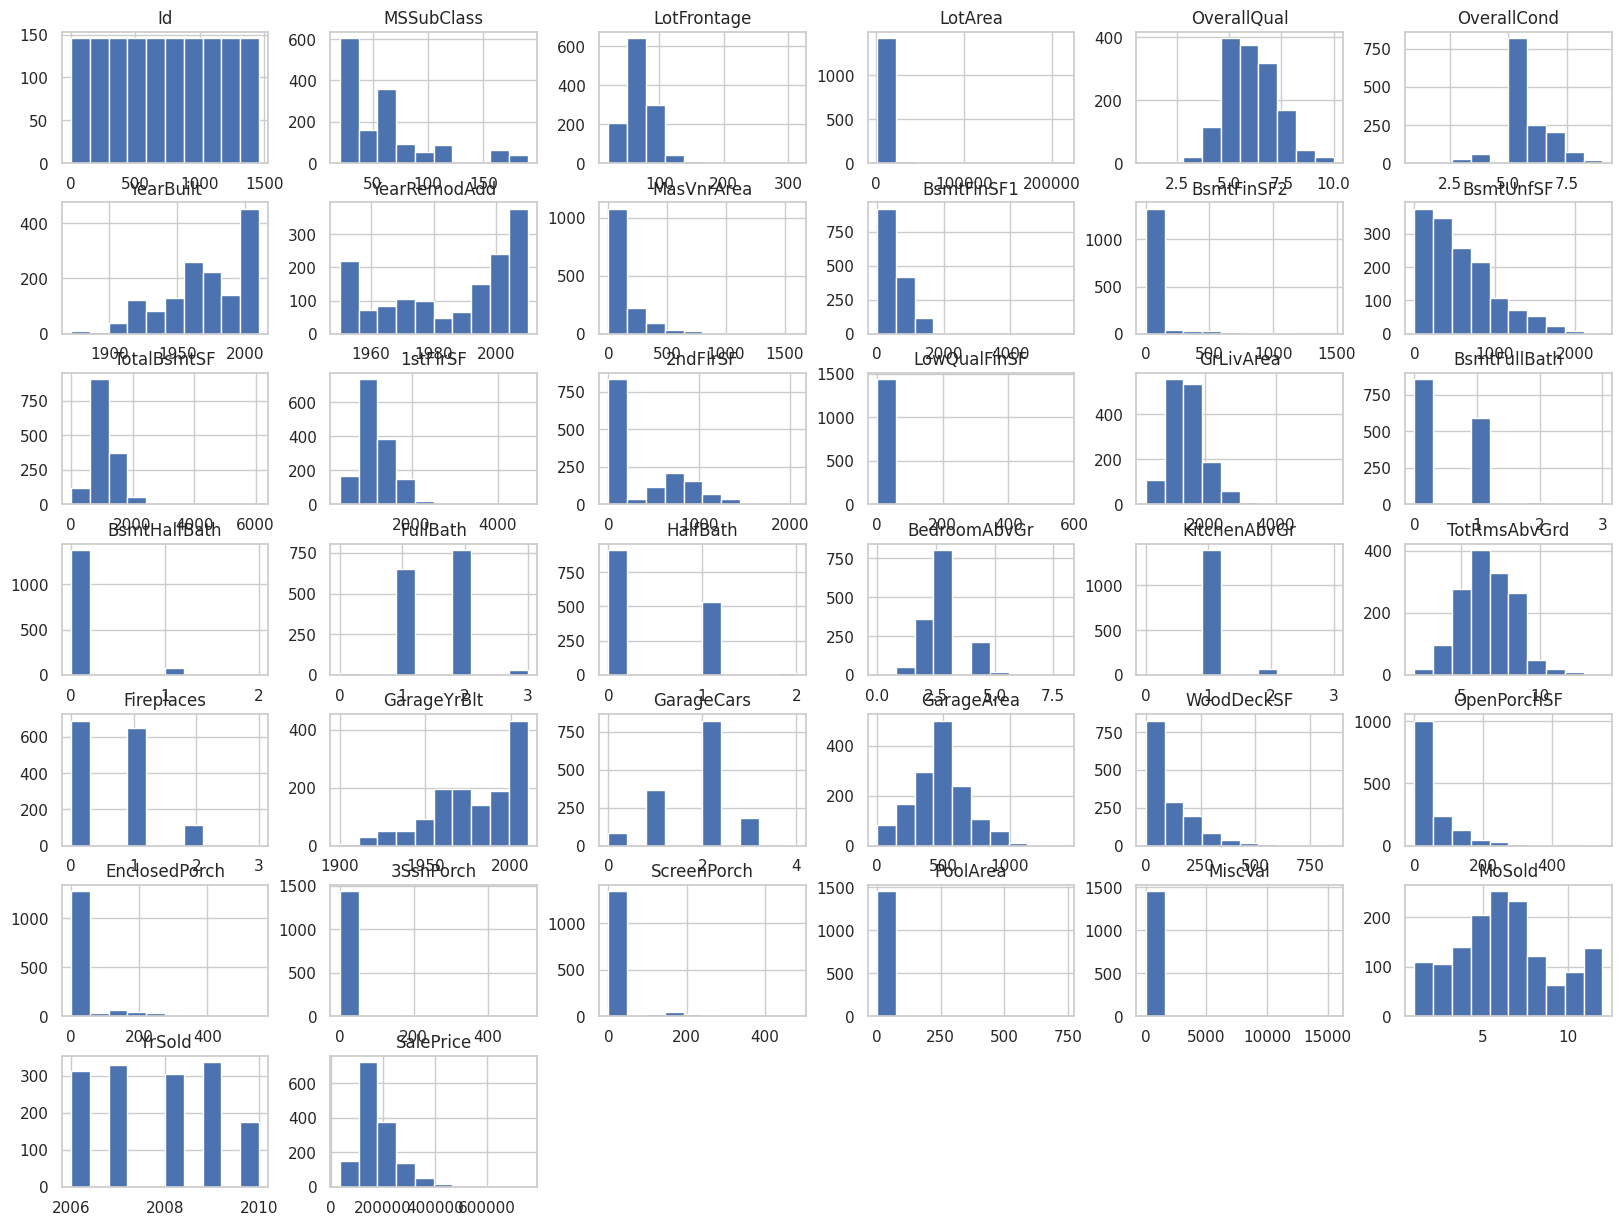

In [25]:
print("\nHistogramas dos atributos numéricos:")
df.hist(figsize=(20, 15))


### **Exercício 3: Listar os atributos mais correlacionados com o target**

Calcule a correlação de Pearson de todos os atributos em relação ao atributo alvo (`SalePrice`) e exiba os atributos em ordem decrescente de correlação.
Lembre de usar o parâmetro `numeric_only=True` no método `corr`, para evitar o erro provocado ao tentar calcular correlação envolvendo atributos categóricos.

In [26]:
# SEU CÓDIGO AQUI
target_name = 'SalePrice' # Define o nome do atributo alvo

print(f"\nCorrelação de Pearson com o target ({target_name}):")

# 1. Calcular a matriz de correlação (apenas para atributos numéricos)
# Usa o parâmetro numeric_only=True conforme solicitado
correlation_matrix = df.corr(numeric_only=True)

# 2. Selecionar a coluna de correlação com o atributo alvo (SalePrice)
target_correlation = correlation_matrix[target_name]

# 3. Filtrar o próprio alvo (que tem correlação 1.0) e obter a ordem decrescente
# O .sort_values(ascending=False) coloca o maior valor de correlação no topo
sorted_correlations = target_correlation.drop(target_name).sort_values(ascending=False)

# 4. Exibir o resultado
print(sorted_correlations)# SEU CÓDIGO AQUI



Correlação de Pearson com o target (SalePrice):
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr   

Faça o scatter plot do atributo de maior correlação (em módulo) e do atributo `SalePrice`.
Faça também um scatter plot para o segundo atributo de maior correlação (em módulo) e o atributo `SalePrice`. É possível observar uma relação aproximadamente linear?

In [27]:
# SEU CÓDIGO AQUI


## 4. Preparação dos Dados

### **Exercício 4: Separar os conjuntos de treino e teste**

Para melhorar a eficiência dos experimentos, vamos usar apenas os atributos `OverallQual`, `GrLivArea`, `Neighborhood` e `GarageCars` (código fornecido abaixo).

Para garantir que a distribuição de preços seja semelhante nos conjuntos de treino e teste, vamos criar uma categoria de preços para usar na amostragem estratificada (código fornecido abaixo).

Em seguida, faça a divisão das instâncias em `train_set` e `test_set` usando a função `train_test_split`, deixando 20% das instâncias no conjunto de teste, e usando `random_state=42`.

Vamos chamar as features do conjunto de treino de `housing_features`, e seus rótulos de `housing_labels` (código fornecido abaixo).

In [28]:
df = df[["OverallQual", "GrLivArea", "Neighborhood", "GarageCars", "SalePrice"]].copy()

df["price_cat"] = pd.cut(df["SalePrice"],
                            bins=[0., 100000, 150000, 200000, 300000, np.inf],
                            labels=[1, 2, 3, 4, 5])

# SEU CÓDIGO AQUI

for set_ in (train_set, test_set):
    set_.drop("price_cat", axis=1, inplace=True)

print(f"Tamanho do conjunto de treino: {len(train_set)}")
print(f"Tamanho do conjunto de teste: {len(test_set)}")

housing_features = train_set.drop("SalePrice", axis=1)
housing_labels = train_set["SalePrice"].copy()

NameError: name 'train_set' is not defined

### **Exercício 5: Criar um Pipeline de Pré-processamento Completo**

Crie um `ColumnTransformer` (chamado `preprocessor`) que:
- Preencha os valores faltantes dos atributos numéricos com a mediana e os padronize.
- Preencha os valores faltantes dos atributos categóricos com o valor mais frequente (`SimpleImputer(strategy='most_frequent')`) e aplique One-Hot encoding.

Em seguida, aplicamos esta transformação nas features (`housing_features`), e armazenamos o resultado em `housing_prepared` (código fornecido abaixo).

In [ ]:
# SEU CÓDIGO AQUI

housing_prepared = preprocessor.fit_transform(housing_features)

## 5. Seleção e Treinamento de Modelos

### **Exercício 6: Treinar e avaliar modelos de base**

Treine os modelos `LinearRegression`, `DecisionTreeRegressor` e `RandomForestRegressor` com parâmetros default e `random_state=42` e imprima o RMSE de cada um no conjunto de treino.

In [ ]:
# SEU CÓDIGO AQUI


### **Exercício 7: Validação cruzada para o RandomForestRegressor**

Avalie o `RandomForestRegressor` (com parâmetros default, e `random_state=42`) usando validação cruzada com 10 folds para ter uma estimativa mais robusta de seu desempenho. Qual a média e desvio padrão do RMSE?

In [ ]:
# SEU CÓDIGO AQUI


## 6. Ajuste Fino e Avaliação Final

### **Exercício 8: Otimização com GridSearchCV**

Use `GridSearchCV` para encontrar os melhores hiperparâmetros para o `RandomForestRegressor`. Teste os valores 20, 30 e 50 para o parâmetro `n_estimators`. Use 5 folds na validação cruzada.

Qual o melhor RMSE encontrado? Para qual valor do parâmetro `n_estimators`?

In [ ]:
# SEU CÓDIGO AQUI


### **Exercício 9: Avaliar o melhor modelo no conjunto de teste**

Finalmente, avalie no conjunto de teste o desempenho do melhor modelo obtido na otimização de hiparparâmetros. Lembre de aplicar o pré-processamento nos atributos do conjunto de teste.

Qual RMSE obtido?

In [ ]:
# SEU CÓDIGO AQUI
